In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from numpy.linalg import inv

In [2]:
#get flights dataset
flights_data = pd.read_csv('dataset/FlightDelays.csv')

In [3]:
# Check if there are any null values in the dataframe
flights_data.isnull().any()
# There are no null values in the data as shown below

CRS_DEP_TIME     False
CARRIER          False
DEP_TIME         False
DEST             False
DISTANCE         False
FL_DATE          False
FL_NUM           False
ORIGIN           False
Weather          False
DAY_WEEK         False
DAY_OF_MONTH     False
TAIL_NUM         False
Flight_Status    False
dtype: bool

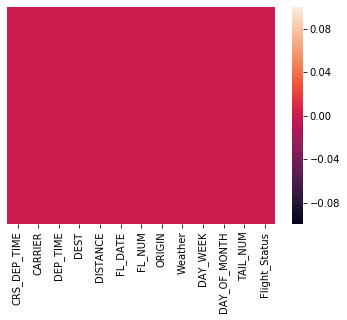

In [4]:
#Check for null values in the dataset
sns.heatmap(flights_data.isnull(), yticklabels=False)
plt.show()


In [5]:
# Cross check the data types of all the columns before modeling
print(flights_data.dtypes)

CRS_DEP_TIME      int64
CARRIER          object
DEP_TIME          int64
DEST             object
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN           object
Weather           int64
DAY_WEEK          int64
DAY_OF_MONTH      int64
TAIL_NUM         object
Flight_Status    object
dtype: object


In [6]:
#converting the object type(String type) to categorical data
#substitute to adding dummy variables

from collections import defaultdict
d = defaultdict(LabelEncoder)

#selecting cols that need to be transformed
df = pd.DataFrame(flights_data, columns = ['CARRIER', 'DEST', 'FL_DATE', 'ORIGIN','TAIL_NUM','Flight_Status'])

# Encoding the variable
fit = df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
flights_df=pd.DataFrame(df.apply(lambda x: d[x.name].transform(x)))

#add the rest of the cols to the dataframe
flights_df['CRS_DEP_TIME']=flights_data['CRS_DEP_TIME']
flights_df['DEP_TIME']=flights_data['DEP_TIME']
flights_df['DISTANCE']=flights_data['DISTANCE']
flights_df['FL_NUM']=flights_data['FL_NUM']
flights_df['Weather']=flights_data['Weather']
flights_df['DAY_WEEK']=flights_data['DAY_WEEK']
flights_df['DAY_OF_MONTH']=flights_data['DAY_OF_MONTH']

#print top 5 values of the dataset
flights_df.head()


,CARRIER,DEST,FL_DATE,ORIGIN,TAIL_NUM,Flight_Status,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
0,4,1,0,0,525,1,1455,1455,184,5935,0,4,1
1,1,1,0,1,262,1,1640,1640,213,6155,0,4,1
2,1,2,0,2,381,1,1245,1245,229,7208,0,4,1
3,1,2,0,2,349,1,1715,1709,229,7215,0,4,1
4,1,2,0,2,384,1,1039,1035,229,7792,0,4,1


In [7]:
#select dependent and independent variables

X = flights_df.drop({'Flight_Status'}, axis=1)
y = flights_df['Flight_Status']

In [8]:
#split dataset into train and test data by 60:40 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12)

# Logistic Regression

In [9]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # print(linear_model)

            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw.astype(float)
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        x=x.astype(float)
        return 1 / (1 + np.exp(-x))
    
    

In [10]:
#call Logistic Regression class
regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [11]:
#find accuracy of the model
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [12]:
#accuracy of the model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.81


# Finding Coefficients

In [13]:
# Changing the index of the records to sequential
X_train.index=range(len(X_train))
y_train.index=range(len(y_train))

# Convert X and Y train sets to matrices
X=np.array(X_train)
Y=np.array(y_train)

# Calculate coefficients from (XT.X)-1.XT.Y
coefficients=inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
# Coefficients from the equation
print(coefficients)

[ 1.56832516e-02 -3.15655385e-02  9.36935481e-01 -2.49546103e-01
 -4.09947423e-04  7.74000813e-04 -8.81998420e-04  1.07127929e-02
  1.22198464e-05 -6.88178332e-01  4.20415214e-03 -9.38309076e-01]


In [14]:
#logistic Regression from Scikit learn (uncomment to model report for logistic regression by scikit learn)
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(max_iter=1000,random_state = 12)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# y_pred

# Model Report

In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.81


In [16]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:", tn, " ", fp, " ", fn, " ", tp)

Confusion Matrix: 0   164   0   717


In [17]:
# Sensitivity
sensitivity=tp/(fn+tp)
print('Sensitivity: {:.2f}'.format(sensitivity))

Sensitivity: 1.00


In [18]:
# Specificity
specificity=tn/(tn+fp)
print('Specificity: {:.2f}'.format(specificity))

Specificity: 0.00


In [19]:
# Precision
precision=tp/(tp+fp)
print('Precision: {:.2f}'.format(precision))

Precision: 0.81


In [20]:
# Accuracy and misclassfication rate
misclassification=1-(accuracy_score(y_test, y_pred))
print('Misclassification: {:.2f}'.format(misclassification))

Misclassification: 0.19


In [21]:
from sklearn.metrics import classification_report
print('Classification report:',classification_report(y_test, y_pred))

Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.81      1.00      0.90       717

    accuracy                           0.81       881
   macro avg       0.41      0.50      0.45       881
weighted avg       0.66      0.81      0.73       881



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
